In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("cereal.csv",sep=";")

In [148]:
df.head(10)

name          mfr         type calories protein  fat  \
0                     String  Categorical  Categorical      Int     Int  Int   
1                  100% Bran            N            C       70       4    1   
2          100% Natural Bran            Q            C      120       3    5   
3                   All-Bran            K            C       70       4    1   
4  All-Bran with Extra Fiber            K            C       50       4    0   
5             Almond Delight            R            C      110       2    2   
6    Apple Cinnamon Cheerios            G            C      110       2    2   
7                Apple Jacks            K            C      110       2    0   
8                    Basic 4            G            C      130       3    2   
9                  Bran Chex            R            C       90       2    1   

  sodium  fiber  carbo sugars potass vitamins shelf weight   cups     rating  
0    Int  Float  Float    Int    Int      Int   Int  Float  Float      Float  
1    130     10      5      6    280       25     3      1   0.33  68.402973  
2     15      2      8      8    135        0     3      1      1  33.983679  
3    260      9      7      5    320       25     3      1   0.33  59.425505  
4    140     14      8      0    330       25     3      1    0.5  93.704912  
5    200      1     14      8     -1       25     3      1   0.75  34.384843  
6    180    1.5   10.5     10     70       25     1      1   0.75  29.509541  
7    125      1     11     14     30       25     2      1      1  33.174094  
8    210      2     18      8    100       25     3   1.33   0.75  37.038562  
9    200      4     15      6    125       25     1      1   0.67  49.120253

In [149]:
df.describe()

name mfr type calories protein fat sodium fiber carbo sugars potass  \
count       78  78   78       78      78  78     78    78    78     78     78   
unique      78   8    3       12       7   6     28    14    23     18     37   
top     String   K    C      110       3   1      0     0    13      3    110   
freq         1  23   74       29      28  30      9    19     8     13      5   

       vitamins shelf weight cups rating  
count        78    78     78   78     78  
unique        4     4      8   13     78  
top          25     3      1    1  Float  
freq         63    36     64   30      1

In [150]:
df.shape

(78, 16)

In [151]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)
df['ones'] = np.ones(df.shape[0])

In [152]:
df.head(5)

mfr type calories protein fat sodium fiber carbo sugars potass vitamins  \
1   N    C       70       4   1    130    10     5      6    280       25   
2   Q    C      120       3   5     15     2     8      8    135        0   
3   K    C       70       4   1    260     9     7      5    320       25   
4   K    C       50       4   0    140    14     8      0    330       25   
5   R    C      110       2   2    200     1    14      8     -1       25   

  shelf weight  cups     rating  ones  
1     3      1  0.33  68.402973   1.0  
2     3      1     1  33.983679   1.0  
3     3      1  0.33  59.425505   1.0  
4     3      1   0.5  93.704912   1.0  
5     3      1  0.75  34.384843   1.0

In [153]:
df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
ones        0
dtype: int64

In [154]:
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'ones'],
      dtype='object')

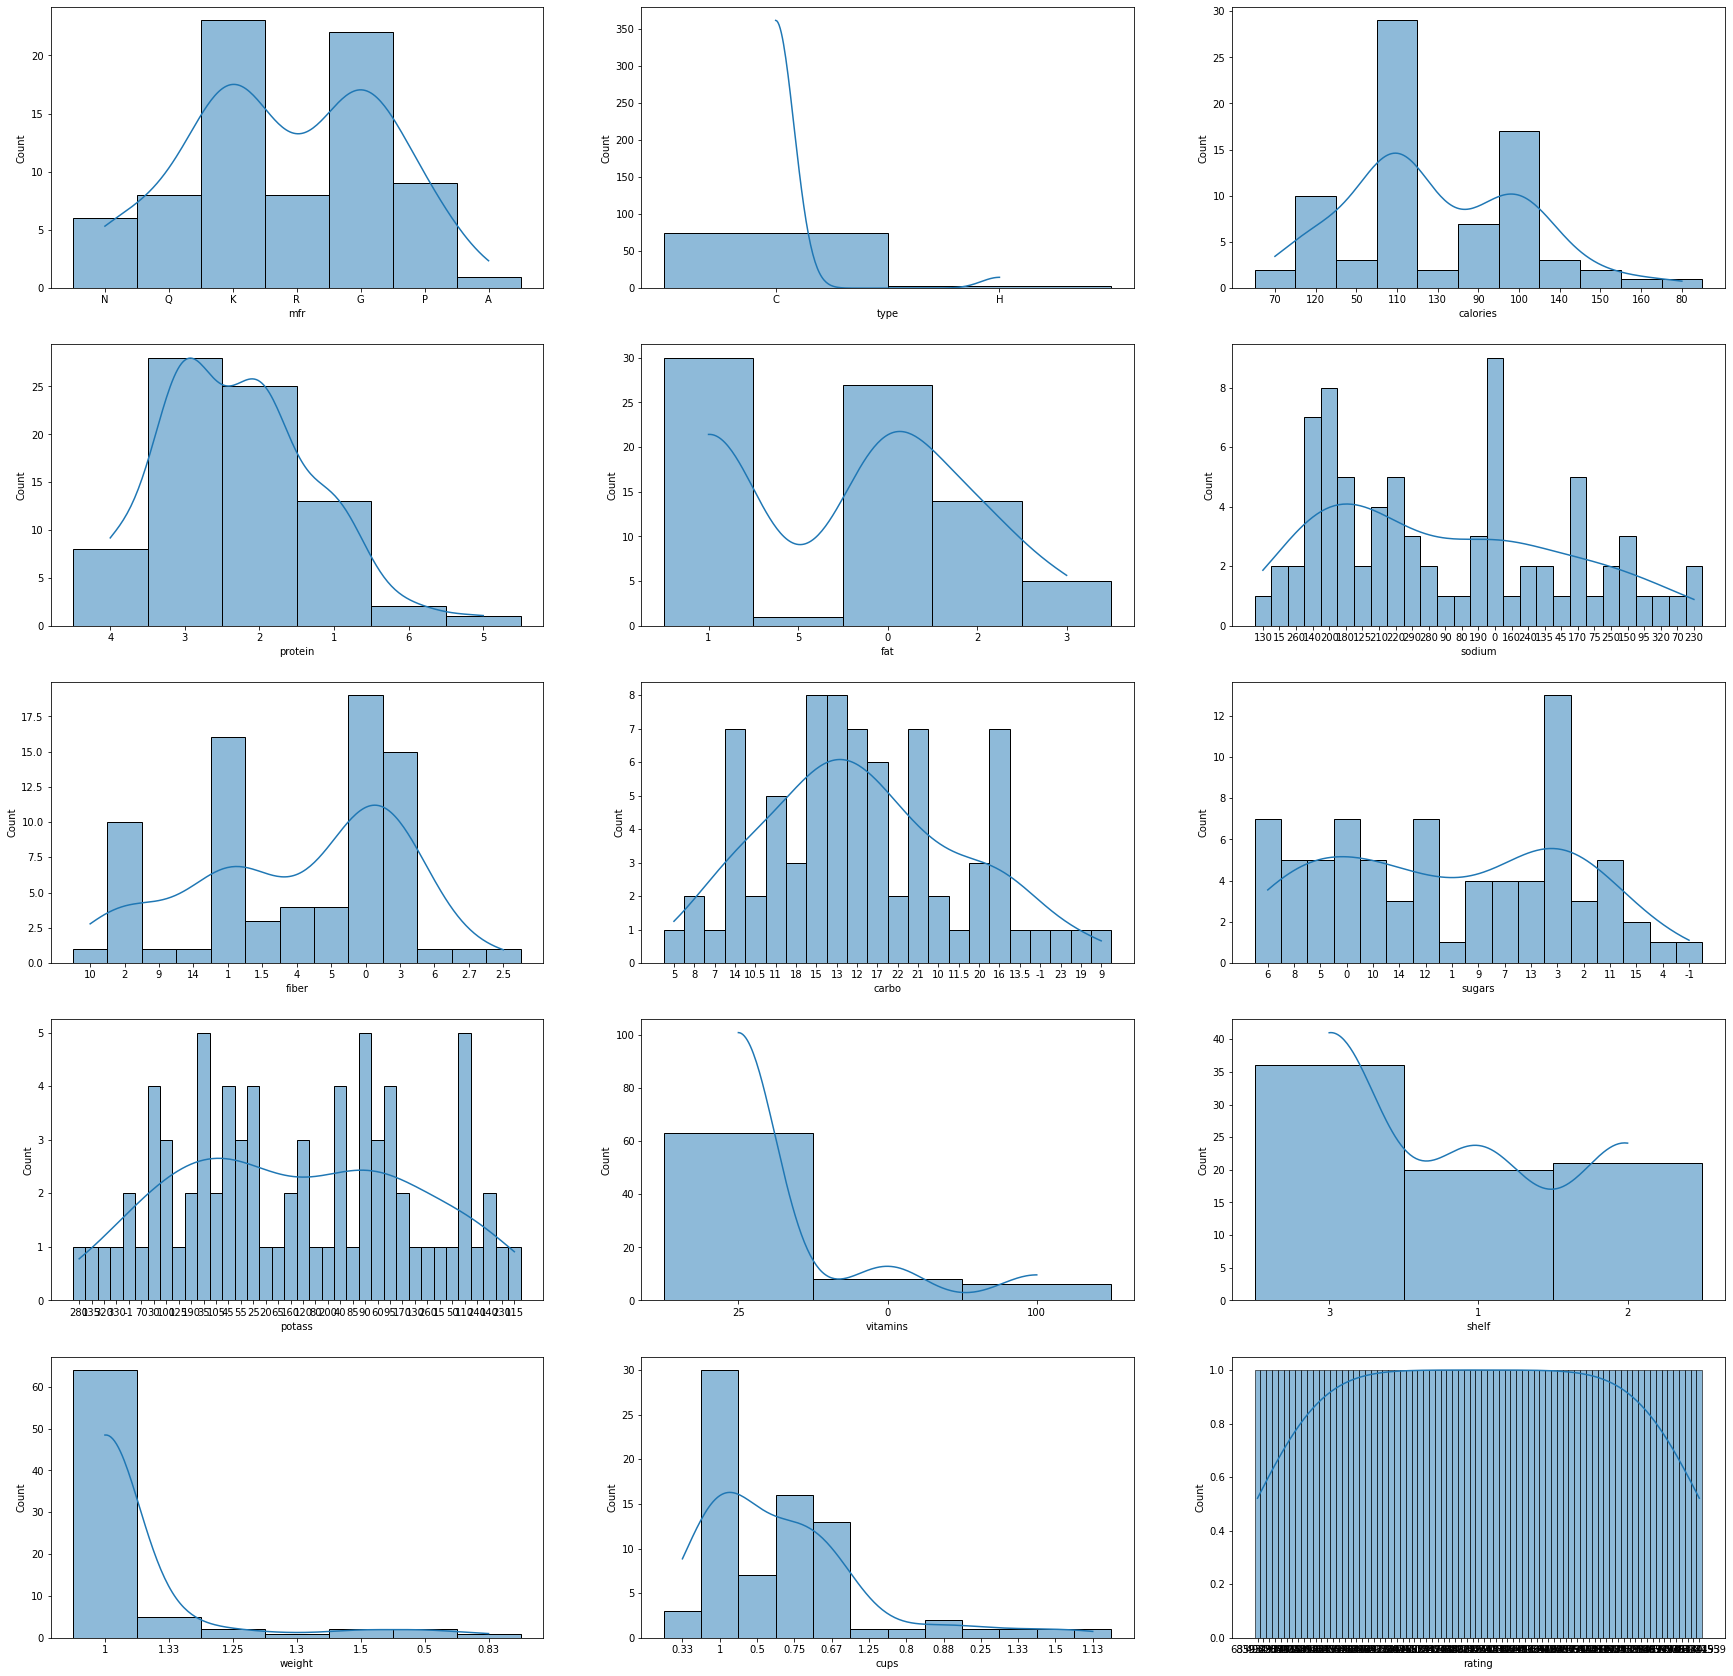

In [155]:
#Visualize the data

plt.figure(figsize=(30,30))
for i in range(15):
    ax = plt.subplot(5,3,i+1)
    sns.histplot(data=df, x=columns[i],kde=True)

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

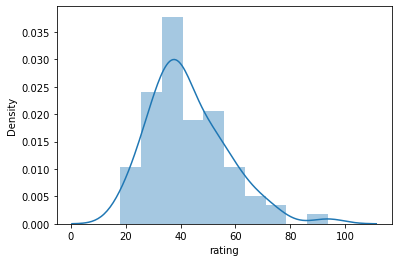

In [156]:
sns.distplot(df["rating"])

In [157]:
df = pd.get_dummies(df, columns=['mfr','type'])
df = df.astype(float)

In [158]:
df.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
1      70.0      4.0  1.0   130.0   10.0    5.0     6.0   280.0      25.0   
2     120.0      3.0  5.0    15.0    2.0    8.0     8.0   135.0       0.0   
3      70.0      4.0  1.0   260.0    9.0    7.0     5.0   320.0      25.0   
4      50.0      4.0  0.0   140.0   14.0    8.0     0.0   330.0      25.0   
5     110.0      2.0  2.0   200.0    1.0   14.0     8.0    -1.0      25.0   

   shelf  ...  ones  mfr_A  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_C  \
1    3.0  ...   1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0     1.0   
2    3.0  ...   1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     1.0   
3    3.0  ...   1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     1.0   
4    3.0  ...   1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     1.0   
5    3.0  ...   1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0     1.0   

   type_H  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
5     0.0  

[5 rows x 23 columns]

In [159]:
X = df.drop(["rating",'mfr_A','type_H'],axis=1,inplace=False)
y = df[["rating"]]

In [160]:
X.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
1      70.0      4.0  1.0   130.0   10.0    5.0     6.0   280.0      25.0   
2     120.0      3.0  5.0    15.0    2.0    8.0     8.0   135.0       0.0   
3      70.0      4.0  1.0   260.0    9.0    7.0     5.0   320.0      25.0   
4      50.0      4.0  0.0   140.0   14.0    8.0     0.0   330.0      25.0   
5     110.0      2.0  2.0   200.0    1.0   14.0     8.0    -1.0      25.0   

   shelf  weight  cups  ones  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_C  
1    3.0     1.0  0.33   1.0    0.0    0.0    1.0    0.0    0.0    0.0     1.0  
2    3.0     1.0  1.00   1.0    0.0    0.0    0.0    0.0    1.0    0.0     1.0  
3    3.0     1.0  0.33   1.0    0.0    1.0    0.0    0.0    0.0    0.0     1.0  
4    3.0     1.0  0.50   1.0    0.0    1.0    0.0    0.0    0.0    0.0     1.0  
5    3.0     1.0  0.75   1.0    0.0    0.0    0.0    0.0    0.0    1.0     1.0

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       ]] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       ]])

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [163]:
X_test.head()

calories   protein       fat    sodium     fiber     carbo    sugars  \
32  0.161019 -1.420902 -0.012988  1.444714 -0.908824  0.094705  0.470552   
33 -0.355585  0.417912 -0.012988 -0.236238  0.358155  0.094705 -0.435260   
24 -0.355585 -0.501495 -1.013072  0.364102 -0.486498  0.800408 -0.435260   
61 -0.872189 -0.501495 -1.013072 -1.917189 -0.064172  0.094705 -0.208807   
9  -0.872189 -0.501495 -0.012988  0.484170  0.780481  0.094705 -0.208807   

      potass  vitamins     shelf    weight      cups  ones     mfr_G  \
32 -0.721211  -0.14627 -0.251230 -0.198067 -0.307262   1.0  1.581139   
33 -0.156418  -0.14627  0.957813 -0.198067  0.255022   1.0 -0.632456   
24 -0.227017  -0.14627  0.957813 -0.198067 -0.307262   1.0 -0.632456   
61  0.196577  -0.14627  0.957813 -0.198067 -1.388576   1.0 -0.632456   
9   0.408375  -0.14627 -1.460273 -0.198067 -0.653283   1.0 -0.632456   

       mfr_K     mfr_N     mfr_P     mfr_Q     mfr_R    type_C  
32 -0.652630 -0.290701 -0.363803 -0.340503 -0.340503  0.201347  
33 -0.652630 -0.290701  2.748737 -0.340503 -0.340503  0.201347  
24 -0.652630 -0.290701 -0.363803 -0.340503  2.936835  0.201347  
61  1.532262 -0.290701 -0.363803 -0.340503 -0.340503  0.201347  
9  -0.652630 -0.290701 -0.363803 -0.340503  2.936835  0.201347

In [164]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.9999999999999987

In [165]:
regression.coef_

array([[-4.31131294e+00,  3.56009211e+00, -1.69126533e+00,
        -4.53848735e+00,  8.15359883e+00,  4.64409635e+00,
        -3.20108488e+00, -2.40749069e+00, -1.13675043e+00,
        -4.20400140e-08, -4.08225760e-09,  5.98650265e-08,
        -2.66453526e-15, -2.08393047e-08,  1.97109388e-08,
         5.58962808e-08,  8.79742059e-08, -3.16964734e-08,
        -3.28117318e-08,  1.35313957e-08]])

In [166]:
X_train = np.transpose(X_train.to_numpy())
y_train = np.transpose(y_train.to_numpy())
X_test = np.transpose(X_test.to_numpy())
y_test = np.transpose(y_test.to_numpy())

In [167]:
### User Defined Linear Regression

def estimate_coef_multiple_linear_regression(X_train, y_train):
    Theta = np.dot(np.linalg.inv(np.dot(X_train, X_train.T)), np.dot(X_train, y_train.T))
    
    return Theta

In [168]:
Theta = estimate_coef_multiple_linear_regression(X_train, y_train)

In [169]:
Theta

array([[-4.31131294e+00],
       [ 3.56009211e+00],
       [-1.69126533e+00],
       [-4.53848735e+00],
       [ 8.15359883e+00],
       [ 4.64409635e+00],
       [-3.20108488e+00],
       [-2.40749069e+00],
       [-1.13675043e+00],
       [-4.20400053e-08],
       [-4.08227407e-09],
       [ 5.98650152e-08],
       [ 4.26657049e+01],
       [-2.08395363e-08],
       [ 1.97107681e-08],
       [ 5.58962228e-08],
       [ 8.79741009e-08],
       [-3.16966009e-08],
       [-3.28118972e-08],
       [ 1.35314338e-08]])

In [170]:
y_pred = np.dot(Theta.T,X_test)

In [171]:
def r_squared(y_test, y_pred):
    return 1 - ((np.sum((y_test-y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2))

In [172]:
## R-Square of model trained using user defined Linear Regression Function & User Defined R-Square Function
r_squared(y_test, y_pred)

0.9999999999999987

In [173]:
## R-Square of model trained using user defined Linear Regression Function & Sklearn R2_score Function

from sklearn.metrics import r2_score

r2_score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.9999999999999987